*Load datasets based from all csv's*

In [47]:
using CSV
using DataFrames
using Plots
using Flux
using Flux: throttle
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1260
┌ Warning: Module RecipesPipeline with build ID 4897973609122 is missing from the cache.
│ This may mean RecipesPipeline [01d81517-befc-4cb6-b9ec-a95719d0359c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1016
┌ Info: Skipping precompilation since __precompile__(false). Importing StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd].
└ @ Base loading.jl:1033
┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260
┌ Warning: Module SpecialFunctions with build ID 4657700789736 is missing from the cache.
│ This may mean SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1016
┌ Warning: Module SpecialFunctions with build ID 4657700789736 is missing from the cache.
│ This may mean SpecialFunctions [276daf66-3868-5448-9

In [2]:
df = CSV.read("../datasets/Amsterdam/listings.csv",DataFrame)

,id,name,host_id,host_name
,Int64,String,Int64,String
1,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel
2,20168,Studio with private bathroom in the centre 1,59484,Alexander
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip
4,28871,Comfortable double room,124245,Edwin
5,29051,Comfortable single room,124245,Edwin
6,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan
7,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP
8,50523,B & B de 9 Straatjes (city center),231946,Raymond
9,55709,Bright Loft in Centre Amsterdam,263233,Jan-Willem


6893×19 DataFrame
  Row │ id                  name                               host_id    host_name                          neighbourhood_group  neighbourhood                      latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365  number_of_reviews_ltm  license                   distance_from_city_center 
      │ Int64               String                             Int64      String                             Missing              String                             Float64   Float64    String15         Int64  Int64           Int64              Dates.Date?  Float64?           Int64                           Int64             Int64                  String31?                 Float64                   
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Excessive output truncated after 524288 bytes.

In [29]:
# rename the id column to avoid confusion with the id function
rename!(df, :id => :listing_id)

,listing_id,name,host_id,host_name
,Int64,String,Int64,String
1,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel
2,20168,Studio with private bathroom in the centre 1,59484,Alexander
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip
4,28871,Comfortable double room,124245,Edwin
5,29051,Comfortable single room,124245,Edwin
6,44391,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan
7,49552,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP
8,50523,B & B de 9 Straatjes (city center),231946,Raymond
9,55709,Bright Loft in Centre Amsterdam,263233,Jan-Willem


In [3]:
function get_distance_from_city_center(x,y)
    amsterdam_city_center = [52.3791, 4.9003]
    return sqrt((x - amsterdam_city_center[1])^2 + (y - amsterdam_city_center[2])^2)
end

get_distance_from_city_center (generic function with 1 method)

In [4]:
# create a new column with the distance from the city center
df.distance_from_city_center = get_distance_from_city_center.(df.latitude,df.longitude)

6893-element Array{Float64,1}:
 0.045724401581650025
 0.01632414775723633
 0.011971486958603795
 0.01472436416284217
 0.01613331026169318
 0.01620816152437004
 0.0094836965366883
 0.020817360543545688
 0.021156268881825844
 0.027666392970535313
 0.03427521699420647
 0.005956710501610961
 0.021278693568919253
 ⋮
 0.06445729128656012
 0.08299929763135505
 0.062099835611657
 0.06952272437124396
 0.0846839453497516
 0.06981531207407415
 0.08144533688309118
 0.07106033563107081
 0.07798449140694576
 0.060792638534613065
 0.08482342247280379
 0.06287860844516131

In [27]:
df_calendar = CSV.read("../datasets/Amsterdam/calendar.csv.gz",DataFrame)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
,Int64,Date,String1,String15?,String15?,Int64?,Int64?
1,2818,2022-09-07,f,$49.00,$49.00,3,1125
2,2818,2022-09-08,f,$49.00,$49.00,3,1125
3,2818,2022-09-09,f,$49.00,$49.00,3,1125
4,2818,2022-09-10,f,$49.00,$49.00,3,1125
5,2818,2022-09-11,f,$49.00,$49.00,3,1125
6,2818,2022-09-12,f,$49.00,$49.00,3,1125
7,2818,2022-09-13,f,$49.00,$49.00,3,1125
8,2818,2022-09-14,f,$49.00,$49.00,3,1125
9,2818,2022-09-15,f,$49.00,$49.00,3,1125


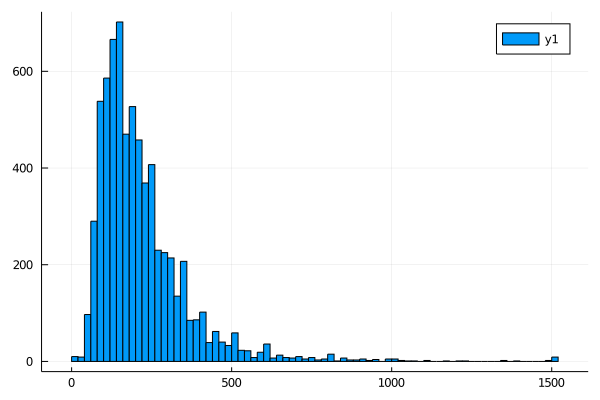

In [5]:
histogram(clamp.(df.price,0,1500))

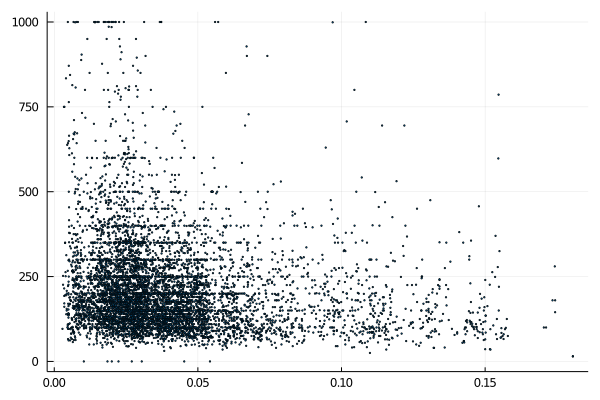

In [6]:
scatter(df.distance_from_city_center,clamp.(df.price,0,1000),legend=false,markersize=1.0)

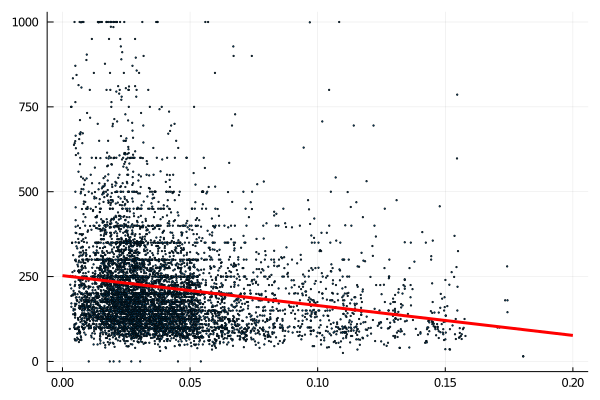

In [7]:
regX = df.distance_from_city_center
regY = clamp.(df.price,0,2000)
X = hcat(ones(length(regX)),regX)
Y = regY
intercept,slope = inv(X'*X)*(X'*Y)

plot!((x) -> intercept + slope * x, 0, 0.2, label="fit_exact",linewidth=3,color=:red)

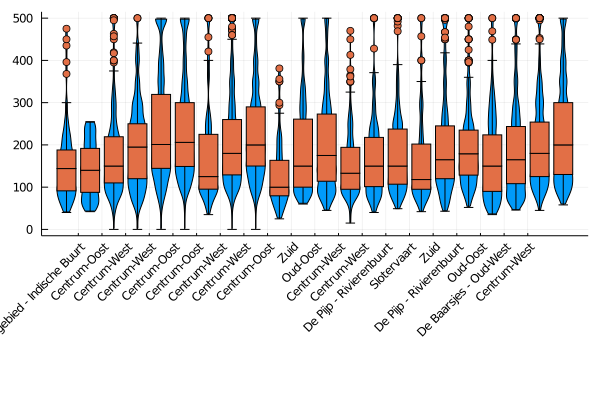

In [62]:
y = rand(100, 4)
violin(df.neighbourhood, clamp.(df.price,0,500), legend=false,figsize=(1000,1000),xticks=(1:20, df.neighbourhood), xrotation=45)
boxplot!(df.neighbourhood, clamp.(df.price,0,500), legend=false,figsize=(1000,1000),xticks=(1:20, df.neighbourhood), xrotation=45)

*Select the best listings based on the price / distance from city centre combo*

*Visualize pricing based on the season to book*

*Compare multiple Cities on price / distance ration*